# **K Means Clustering**

K-Means is one of the simplest and most widely used clustering algorithms in unsupervised learning. It is used to partition a dataset into K distinct clusters based on their features. Unlike supervised learning, where we have labeled data, clustering attempts to group data points into similar groups without prior labels.



* Cluster Assignment: Assign each data point to the closest cluster centroid.
* Centroid Update: Update the cluster centroids to be the mean of the data points assigned to them. <br>
These steps repeat until the centroids stabilize (i.e., they don’t change significantly) or a maximum number of iterations is reached.

K-Means minimizes the Within-Cluster Sum of Squares (WCSS), also known as the inertia:

**Challenges and Limitations** <br>

Choosing 
K: The number of clusters 
K must be chosen beforehand.
Methods like the elbow method or silhouette score can help determine the optimal 
K. <br>

Random Initialization:Poor initialization can lead to suboptimal solutions.
Use K-Means++ initialization to improve the chances of convergence to a better solution. <br>

Sensitive to Outliers: Outliers can skew the centroids since K-Means uses the mean to update centroids. <br>

Non-Spherical Clusters:K-Means assumes clusters are roughly spherical and of similar size. If clusters are elongated or vary significantly in size, K-Means may not perform well.

Advantage
* Simple and Fast: It’s computationally efficient and easy to understand.
* Scalable: Works well for large datasets.
* General Purpose: Can be applied to a wide range of problems.


When to stop?
* Centroids Converge: The centroids do not move significantly between iterations.
* Maximum Iterations: The algorithm reaches the predefined maximum number of iterations.
* Change in Inertia: The decrease in inertia (sum of squared distances) between iterations is below a threshold.


## Scratch Implementation

* Create class K-mean
* Create constructor with parameter K(no of clusters) and initalize clusters and lables
* Input train_data as X using fit method
* Find labels with respect to cluster for each data point
* repeat until find best cluster

In [123]:
import numpy as np

In [124]:
a = np.array([[1,2,3,4],[4,5,6,5],[4,57,0,1]])
b = np.array([[4,5,6,2],[6,7,8,4],[7,79,0,4],[3,4,5,2]])
a = a[:,np.newaxis,:]
d = a - b

In [125]:
d.shape

(3, 4, 4)

In [126]:
d

array([[[ -3,  -3,  -3,   2],
        [ -5,  -5,  -5,   0],
        [ -6, -77,   3,   0],
        [ -2,  -2,  -2,   2]],

       [[  0,   0,   0,   3],
        [ -2,  -2,  -2,   1],
        [ -3, -74,   6,   1],
        [  1,   1,   1,   3]],

       [[  0,  52,  -6,  -1],
        [ -2,  50,  -8,  -3],
        [ -3, -22,   0,  -3],
        [  1,  53,  -5,  -1]]])

In [127]:
d.sum(axis=2)

array([[ -7, -15, -80,  -4],
       [  3,  -5, -70,   6],
       [ 45,  37, -28,  48]])

In [128]:
d.sum(axis=2).argmax(axis=0)

array([2, 2, 2, 2], dtype=int64)

In [129]:
d[0,:,:]

array([[ -3,  -3,  -3,   2],
       [ -5,  -5,  -5,   0],
       [ -6, -77,   3,   0],
       [ -2,  -2,  -2,   2]])

In [130]:
d[:,0,:]

array([[-3, -3, -3,  2],
       [ 0,  0,  0,  3],
       [ 0, 52, -6, -1]])

In [131]:
d[:,:,0]

array([[-3, -5, -6, -2],
       [ 0, -2, -3,  1],
       [ 0, -2, -3,  1]])

In [132]:
d.argmax(axis=2)

array([[3, 3, 2, 3],
       [3, 3, 2, 3],
       [1, 1, 2, 1]], dtype=int64)

## Inbuilt method

## Example

In [133]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [134]:
X,y = make_blobs(n_features=4,n_samples=1000)

In [135]:
X,y

(array([[-3.78763725,  3.77117923,  2.02789072,  6.49067716],
        [-4.00056812,  8.65980997,  1.33483807,  5.99962122],
        [ 3.56440504, -9.22204923,  7.40668607, -7.55177995],
        ...,
        [ 6.02154819,  5.89041184,  3.02597805, -3.34702543],
        [-5.99472946,  6.20717345,  1.61024922,  5.51120707],
        [-2.70398906,  4.03507784,  1.3418808 ,  5.16822696]]),
 array([0, 0, 1, 2, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0,
        2, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1,
        2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0,
        1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 1, 2, 2, 0, 2, 0, 2, 1,
        1, 2, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 0, 1, 2, 1,
        0, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 1,
        0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 2, 0, 0,
        0, 2, 2, 0, 2

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [137]:
wcci = []
for i in range(1,10):
    kmean = KMeans(n_clusters=i,n_init='auto')
    kmean.fit(X_train)
    wcci.append(kmean.inertia_)

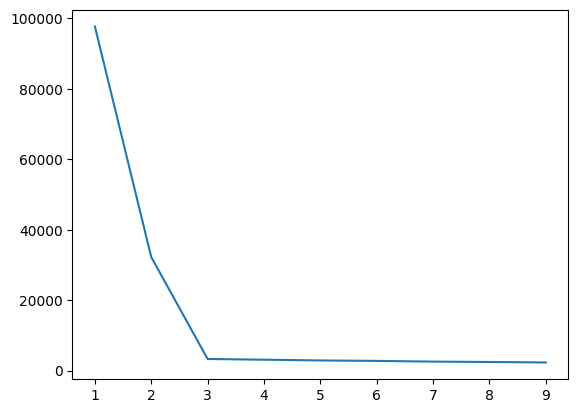

In [138]:
plt.plot(range(1,10),wcci)

From this plot we can conclude that 3 is the best no of cluster.

In [139]:
kmean = KMeans(n_clusters=3,n_init='auto')
kmean.fit(X_train)

KMeans(n_clusters=3, n_init='auto')

In [140]:
labels = kmean.labels_

In [141]:
centroids = kmean.cluster_centers_

In [142]:
# Silhouette Score
score = silhouette_score(X_train, labels)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.8264984677984052


In [143]:
X_train.shape

(800, 4)

In [144]:
from sklearn.decomposition import PCA

In [145]:
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [146]:
centroids_reduced = pca.fit_transform(centroids)

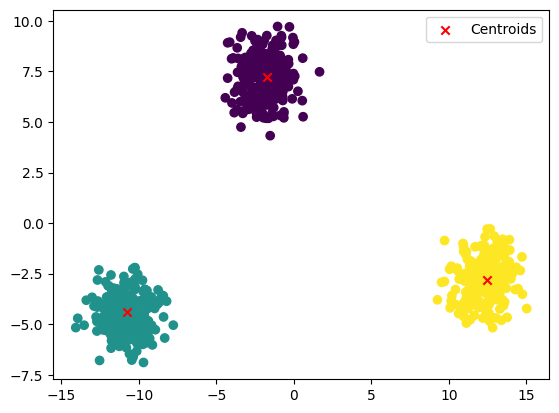

In [148]:
plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], color='red', marker='x', label='Centroids')
plt.legend()
plt.show()

**Tips for Effectively Using K-Means**


1. Tip 1: Choosing the Number of Clusters
* The choice of 
𝐾
K is crucial. Here are two common techniques:

* Elbow Method: Plot the inertia (WCSS) as a function of 
𝐾
K. Look for the "elbow" point where inertia stops decreasing significantly.
Silhouette Score: Measures how similar a data point is to its own cluster compared to others. Higher scores indicate better-defined clusters.